In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
line_re = re.compile(r'position=<\s*([+-]?\d+),\s*([+-]?\d+)> velocity=<\s*([+-]?\d+),\s*([+-]?\d+)>')

In [3]:
test_input = """position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>""".splitlines()

In [4]:
def lines_to_df(lines):
    xvec = []; yvec = []; vxvec = []; vyvec = []
    for line in lines:
        x, y, vx, vy = line_re.match(line).groups()
        xvec.append(int(x))
        yvec.append(int(y))
        vxvec.append(int(vx))
        vyvec.append(int(vy))
    df = pd.DataFrame({'x':xvec, 'y':yvec, 'vx': vxvec, 'vy': vyvec})
    return df

In [5]:
def step(df):
    df.x += df.vx
    df.y += df.vy

In [6]:
test_df = lines_to_df(test_input)
test_df.head()

,x,y,vx,vy
0,9,1,0,2
1,7,0,-1,0
2,3,-2,-1,1
3,6,10,-2,-1
4,2,-4,2,2


In [7]:
def find_min_var_image(df_orig, max_steps):
    df = df_orig.copy()
    min_var = df.x.var() + df.y.var()
    min_var_idx = 0
    var_vec = [min_var]
    for i in range(1, max_steps+1):
        step(df)
        var = df.x.var() + df.y.var()
        var_vec.append(var)
        if var < min_var:
            min_var = var
            min_var_idx = i
    df = df_orig.copy()
    print('min var index = ', min_var_idx)
    for i in range(min_var_idx):
        step(df)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(df.x, df.y, 'o')
    ax.invert_yaxis()
    return pd.DataFrame({'step':range(max_steps+1), 'var': var_vec}), df

min var index =  3


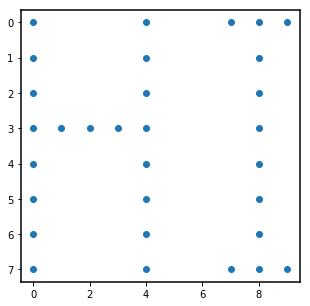

In [8]:
vardf, test_min_img = find_min_var_image(test_df, 10)

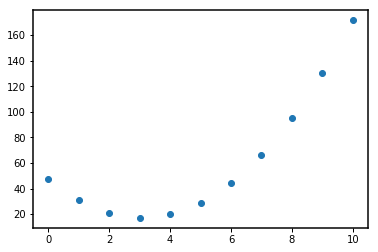

In [9]:
plt.plot(vardf['step'], vardf['var'], 'o')

In [10]:
with open('inputs/day10.txt') as fp:
    puzzle_lines = fp.readlines()
puzzle_df = lines_to_df(puzzle_lines)
puzzle_df.head()

,x,y,vx,vy
0,-42346,10806,4,-1
1,-31708,-21106,3,2
2,-10445,-10472,1,1
3,-21064,-42388,2,4
4,53393,32093,-5,-3


min var index =  10639


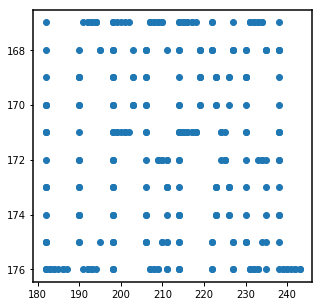

In [11]:
puzzle_vardf, puzzle_min_img = find_min_var_image(puzzle_df, 15000)

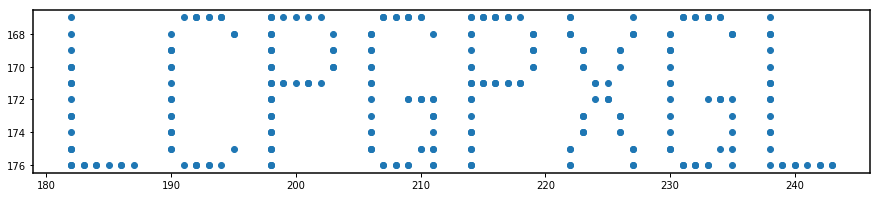

In [12]:
df = puzzle_min_img.copy()
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(df.x, df.y, 'o')
ax.invert_yaxis()
#plt.axis([165, 250, 165, 250])

### Part 2 ###

In [13]:
assert 3 == vardf['var'].idxmin() # test time for the image to align in seconds

In [14]:
puzzle_vardf['var'].idxmin()

10639